In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import special
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
from sklearn.metrics import log_loss,accuracy_score
init_notebook_mode(connected= True)
np.random.seed(1)

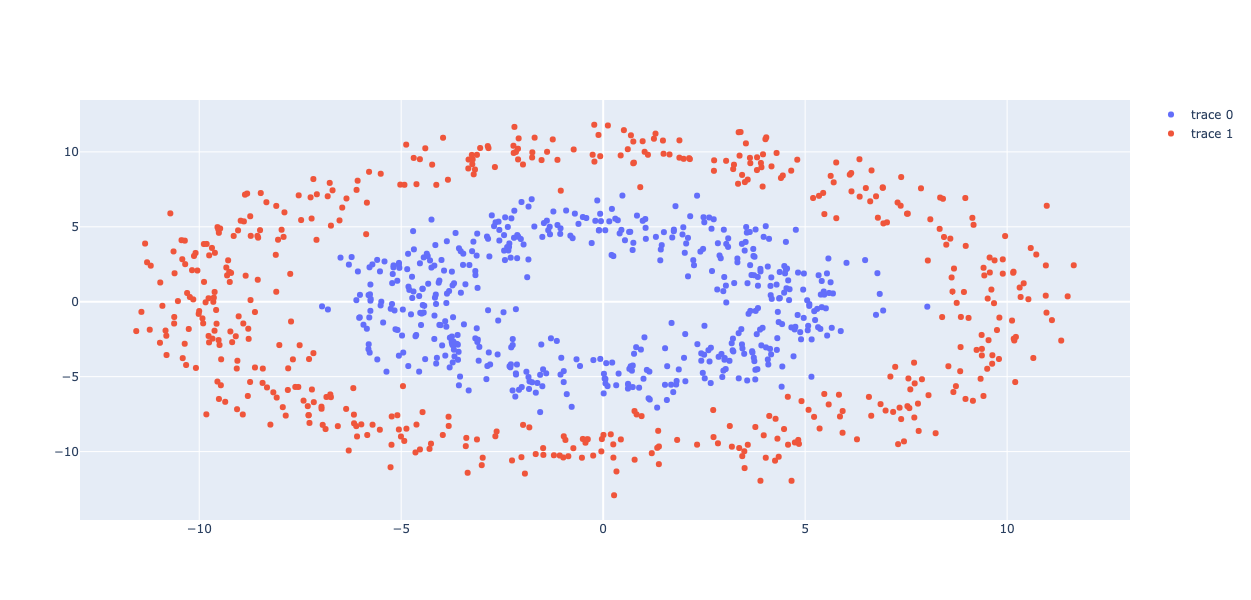

In [2]:
N =1000
r_inner = 5
r_outer = 10

r_inner_plot = r_inner + np.random.randn(N//2)
theta_inner = 2*np.pi*np.random.rand(N//2)
X1 = np.vstack(( np.zeros(N//2),np.ones(N//2),r_inner_plot*np.cos(theta_inner),r_inner_plot*np.sin(theta_inner))).T


r_outer_plot = r_outer + np.random.randn(N//2)
theta_outer = 2*np.pi*np.random.rand(N//2)
X2 = np.vstack((np.ones(N//2), np.ones(N//2),r_outer_plot*np.cos(theta_outer),r_outer_plot*np.sin(theta_outer))).T


Xb = np.vstack((X1,X2))
Y = Xb[:,0]
fig = go.Figure()
fig.add_trace(go.Scatter(x= Xb[Xb[:,0] == 0,2],y=Xb[Xb[:,0] == 0,3],mode = 'markers'))
fig.add_trace(go.Scatter(x=Xb[Xb[:,0] == 1,2],y=Xb[Xb[:,0] == 1,3],mode = 'markers'))
fig.update_layout(
    width=600,
    height=600
)
fig.show()

In [3]:
Xb1 = np.append(Xb,np.sqrt(Xb[:,2]**2 + Xb[:,3]**2).reshape(N,1),axis=1)
Xb2 = Xb1[:,1:]
D = Xb2.shape[1]
w = np.random.randn(D) # randomly initialize w

costs = []
l = 0.0001
reg_lambda = 0.1

for i in range(5000):
    y_pred = sp.special.expit(Xb2.dot(w))
    w = w + l*((Y - y_pred).dot(Xb2) - reg_lambda*w)
    costs.append(log_loss(Y,y_pred,normalize=False))
    if i%500 ==0:
        print(log_loss(Y,y_pred,normalize=False))
print(w)

8738.965775680306
218.94195774129918
143.5670946272803
111.22408663066142
93.05364386422775
81.31205831404974
73.04750146018259
66.88554458346107
62.09719385796567
58.25856214350728
[-1.16725726e+01 -8.24442996e-03 -7.85660315e-03  1.57158998e+00]


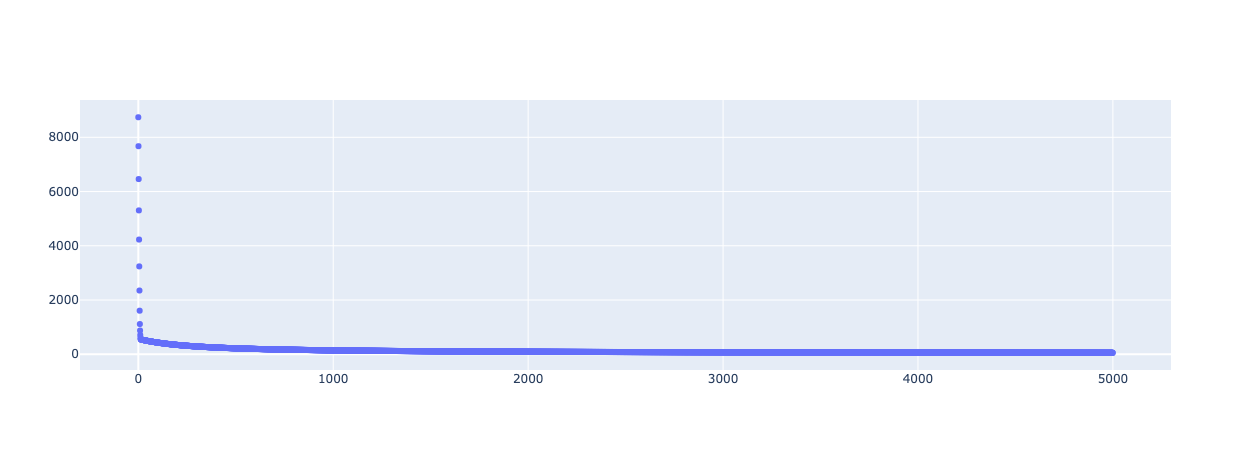

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=costs,mode = 'markers'))

fig.show()

In [5]:
accuracy_score(Y,np.round(y_pred))

0.996